In [1]:
import os

import pandas as pd
import polars as pl

In [2]:
CWD = os.getcwd()
PATH_INPUT_FOLDER = os.path.join(CWD, "input")

In [3]:
fs = sorted([os.path.join(PATH_INPUT_FOLDER, f) for f in os.listdir(PATH_INPUT_FOLDER)])

In [4]:
df = pd.concat([pd.read_parquet(path = path) for path in fs[:5]])

In [5]:
114_842_782

114842782

In [6]:
df.shape

(9344926, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344926 entries, 0 to 2507108
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   VendorID              int64         
 1   TpepPickupDatetime    datetime64[ns]
 2   TpepDropoffDatetime   datetime64[ns]
 3   PassengerCount        float64       
 4   TripDistance          float64       
 5   RatecodeID            float64       
 6   StoreAndFwdFlag       object        
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   PaymentType           int64         
 10  FareAmount            float64       
 11  Extra                 float64       
 12  MtaTax                float64       
 13  TipAmount             float64       
 14  TollsAmount           float64       
 15  ImprovementSurcharge  float64       
 16  TotalAmount           float64       
 17  CongestionSurcharge   float64       
 18  AirportFee            float64       
dtypes: da

In [8]:
df.head()

,VendorID,TpepPickupDatetime,TpepDropoffDatetime,PassengerCount,TripDistance,RatecodeID,StoreAndFwdFlag,PULocationID,DOLocationID,PaymentType,FareAmount,Extra,MtaTax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,NaN


In [9]:
df.head()["TpepPickupDatetime"].dt.day

0    1
1    1
2    1
3    1
4    1
Name: TpepPickupDatetime, dtype: int32

In [10]:
# %%timeit

# (
#     df
#     [["TpepPickupDatetime", "TripDistance", "TotalAmount", "PaymentType"]]
#     .assign(
#         DateOfWeek = df["TpepPickupDatetime"].dt.day
#     )
#     .set_index("TpepPickupDatetime")
#     .groupby(["PaymentType"])
#     .resample("D")
#     ["TripDistance"]
#     .mean()
# )

# ### 4.16 s ± 50.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
4.16 * 12.666666666666666

52.693333333333335

In [12]:
114/9

12.666666666666666

In [13]:
(
    df
    [["TpepPickupDatetime", "TripDistance", "TotalAmount", "PaymentType"]]
    .assign(
        DateOfWeek = df["TpepPickupDatetime"].dt.day
    )
    .set_index("TpepPickupDatetime")
    .groupby(["PaymentType"])
    .resample("D")
    ["TripDistance"]
    .mean()
)

PaymentType  TpepPickupDatetime
0            2021-01-01             7.251882
             2021-01-02             6.544945
             2021-01-03            91.774073
             2021-01-04            14.980734
             2021-01-05            19.919565
                                     ...    
4            2021-05-27             2.680473
             2021-05-28             2.632170
             2021-05-29             2.373442
             2021-05-30             2.950102
             2021-05-31             3.019135
Name: TripDistance, Length: 14024, dtype: float64

In [14]:
os.path.join(PATH_INPUT_FOLDER, f"yellow*.parquet")

'/Users/nicolaepopescul/Desktop/code/streams/20240512_polars/input/yellow*.parquet'

In [15]:
pldf = pl.scan_parquet(source = os.path.join(PATH_INPUT_FOLDER, f"yellow*.parquet"))

In [ ]:
# pandas: 9_344_926   --> 4.16 s --> Todo en Memoria
# polars: 114_842_782 --> 7.99 s --> Leyendo del disco -> procesando en dataset

In [18]:
pldf.head().collect()

VendorID,TpepPickupDatetime,TpepDropoffDatetime,PassengerCount,TripDistance,RatecodeID,StoreAndFwdFlag,PULocationID,DOLocationID,PaymentType,FareAmount,Extra,MtaTax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,"""N""",142,43,2,8.0,3.0,0.5,0.0,0.0,0.3,11.8,2.5,null
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,"""N""",238,151,2,3.0,0.5,0.5,0.0,0.0,0.3,4.3,0.0,null
1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,"""N""",132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,null
1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,"""N""",138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,null
2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,"""N""",68,33,1,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,null


In [20]:
pldf.select(pl.col("PassengerCount").is_null()).collect().sum()

PassengerCount
u32
4482126


In [22]:
plan = (
    pldf
    .with_columns(
        DayOfWeek = pl.col("TpepPickupDatetime").dt.weekday()
    )
    .filter(
        ~pl.col("PassengerCount").is_null()        
    )
    .select(pl.col(["TpepPickupDatetime", "TripDistance", "TotalAmount", "PaymentType"]))
    .sort("TpepPickupDatetime")
    .group_by_dynamic(
        index_column = "TpepPickupDatetime",
        every = "1h",
        group_by = "PaymentType"
    )
    .agg(
        MeanTripDistance = pl.col("TripDistance").mean()
    )
)

In [30]:
# Polars: Query Engine con API DataFrame

In [29]:
(
    plan
    .collect()
    .head()
)

PaymentType,TpepPickupDatetime,MeanTripDistance
i64,datetime[ns],f64
2,2001-01-01 00:00:00,10.248
2,2001-01-01 01:00:00,4.68
2,2001-08-23 05:00:00,7.08
2,2002-10-21 00:00:00,3.27
2,2002-10-21 05:00:00,2.72


In [24]:
plan

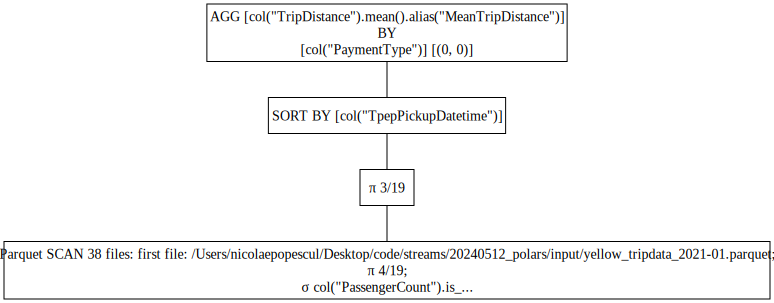

In [28]:
plan.show_graph(optimized = True)

In [ ]:
# pl.scan_parquet?? # Lazy

In [ ]:
# %%timeit

# (
#     pldf
#     .select(pl.col(["TpepPickupDatetime", "TripDistance", "TotalAmount", "PaymentType"]))
#     .with_columns(
#         DateOfWeek = pl.col("TpepPickupDatetime").dt.weekday()
#     )
#     .sort("TpepPickupDatetime")
#     .group_by_dynamic(
#         index_column = "TpepPickupDatetime",
#         every = "1h",
#         group_by = "PaymentType"
#     )
#     .agg(
#         MeanTripDistance = pl.col("TripDistance").mean()
#     )
#     .collect()
# )

# ### 7.81 s ± 1.44 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
